Работа с датасетом MovieLens

https://grouplens.org/datasets/movielens/

См книгу 
Python for Data Analysis, Wes McKinney
2. Introductory Examples, MovieLens 1M Data Set (стр. 26)

1. Оценить количество фильмов, пользователей и оценок
2. Оценить распределения (предлагается построить распределения количества оценок по фильмам и пользователям и увидеть т.н. "длинные хвосты" в распределениях)
3. Оценить средние оценки по фильмам и по пользователям
4. Выбрать критерий, показывающий, что фильм нравится всем, или не нравится никому, и вывести топ фильмов из этих списков. Знаете ли вы эти фильмы, согласны ли с оценками?
5. Выбрать лучшие фильмы
6. Посмотреть на смещение оценок, увидеть сколько пользователей занижают оценки и завышают оценки.
7. Построить рекомендательную систему с помощью библиотеки surprise (или другой, по желанию). Применить подбор параметров модели на сетке, оценить качество полученной модели по выбранной вами метрике. 
8. Получить рекомендации для нового пользователя, совпадают ли они с лучшими фильмами?
9. Поставьте оценку какому-нибудь фильму (который вы знаете и можете поставить оценку) и получите рекомендации, насколько они качественные по вашим ощущениям? Сделайте это для фильма с негативной оценкой и для фильма с позитивной оценкой.
10. Добавляйте оценки и посмотрите, как изменяются рекомендации фильмов. Соответствуют ли они вашим предпочтениям? Есть ли недостатки у системы? Сколько нужно оценок для того, чтобы рекомендации стали релевантными? (в этом пункте добавляйте оценки в том числе из интересного вам жанра для пункта 11)
11. Построить рекомендательную систему по подвыборке - выбрать интересный вам жанр. Изменились ли рекомендации? Стали лучше\хуже?
12(*). сделать самостоятельное исследование и выяснить, как добавить нового пользователя\фильм в систему без переобучения всей модели, описать архитектуру такого решения


In [2]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
rating = pd.read_csv('ml-latest-small/ratings.csv')

In [9]:
rating.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [10]:
movie = pd.read_csv('ml-latest-small/movies.csv')

In [11]:
movie.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [115]:
rating.describe()

,userId,movieId,rating,timestamp,count
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100836.0
mean,326.127564,19435.295718,3.501557,1.205946e+09,1.0
std,182.618491,35530.987199,1.042529,2.162610e+08,0.0
min,1.000000,1.000000,0.500000,8.281246e+08,1.0
25%,177.000000,1199.000000,3.000000,1.019124e+09,1.0
50%,325.000000,2991.000000,3.500000,1.186087e+09,1.0
75%,477.000000,8122.000000,4.000000,1.435994e+09,1.0
max,610.000000,193609.000000,5.000000,1.537799e+09,1.0


1. Оценить количество фильмов, пользователей и оценок

In [21]:
rating.shape

(100836, 4)

В анализе принято оценок - 100836

Количество пользователей

In [15]:
rating['userId'].unique().shape

(610,)

Количество фильмов


In [20]:
rating['movieId'].unique().shape

(9724,)

2. Оценить распределения (предлагается построить распределения количества оценок по фильмам и пользователям и увидеть т.н. "длинные хвосты" в распределениях)


In [26]:
userId = rating['userId']

In [30]:
count_user = userId.value_counts()

(array([378.,  98.,  44.,  22.,  20.,  12.,   7.,   7.,   1.,   5.,   4.,
          3.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([  20.        ,  109.26666667,  198.53333333,  287.8       ,
         377.06666667,  466.33333333,  555.6       ,  644.86666667,
         734.13333333,  823.4       ,  912.66666667, 1001.93333333,
        1091.2       , 1180.46666667, 1269.73333333, 1359.        ,
        1448.26666667, 1537.53333333, 1626.8       , 1716.06666667,
        1805.33333333, 1894.6       , 1983.86666667, 2073.13333333,
        2162.4       , 2251.66666667, 2340.93333333, 2430.2       ,
        2519.46666667, 2608.73333333, 2698.        ]),
 <a list of 30 Patch objects>)

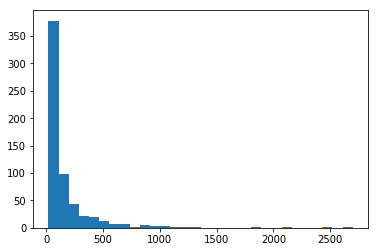

In [34]:
plt.hist(userId.value_counts(), bins = 30)

основная часть ставит немного оценок

(array([7.757e+03, 8.360e+02, 3.530e+02, 2.460e+02, 1.490e+02, 1.040e+02,
        6.300e+01, 4.300e+01, 3.500e+01, 3.600e+01, 1.800e+01, 1.800e+01,
        1.600e+01, 7.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 6.000e+00,
        7.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  1.        ,  11.93333333,  22.86666667,  33.8       ,
         44.73333333,  55.66666667,  66.6       ,  77.53333333,
         88.46666667,  99.4       , 110.33333333, 121.26666667,
        132.2       , 143.13333333, 154.06666667, 165.        ,
        175.93333333, 186.86666667, 197.8       , 208.73333333,
        219.66666667, 230.6       , 241.53333333, 252.46666667,
        263.4       , 274.33333333, 285.26666667, 296.2       ,
        307.13333333, 318.06666667, 329.        ]),
 <a list of 30 Patch objects>)

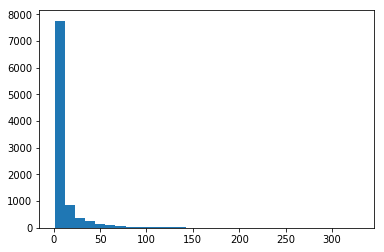

In [35]:
plt.hist(rating['movieId'].value_counts(), bins = 30)

Аналогично с фильмами

3. Оценить средние оценки по фильмам и по пользователям

Немного непонятно задание, но построим гистограмму по средним для фильмов и пользователей

In [38]:
mean_userid = rating.groupby('userId').mean()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,
         1.,  3.,  2.,  0.,  6.,  8.,  7.,  4.,  8.,  5., 12., 10., 21.,
        32., 31., 37., 27., 37., 33., 33., 44., 39., 38., 37., 30., 27.,
        22., 12., 16., 10.,  5.,  1.,  3.,  1.,  2.,  1.,  1.]),
 array([1.275 , 1.3495, 1.424 , 1.4985, 1.573 , 1.6475, 1.722 , 1.7965,
        1.871 , 1.9455, 2.02  , 2.0945, 2.169 , 2.2435, 2.318 , 2.3925,
        2.467 , 2.5415, 2.616 , 2.6905, 2.765 , 2.8395, 2.914 , 2.9885,
        3.063 , 3.1375, 3.212 , 3.2865, 3.361 , 3.4355, 3.51  , 3.5845,
        3.659 , 3.7335, 3.808 , 3.8825, 3.957 , 4.0315, 4.106 , 4.1805,
        4.255 , 4.3295, 4.404 , 4.4785, 4.553 , 4.6275, 4.702 , 4.7765,
        4.851 , 4.9255, 5.    ]),
 <a list of 50 Patch objects>)

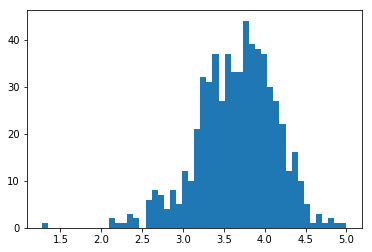

In [40]:
plt.hist(mean_userid['rating'], bins=50)

По виду близко к нормальному распределению, при этом среднее значение около 3,5. Т.е. у каждого пользователя своя система оценок

In [43]:
mean_movieid = rating.groupby('movieId').mean()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,
         1.,  3.,  2.,  0.,  6.,  8.,  7.,  4.,  8.,  5., 12., 10., 21.,
        32., 31., 37., 27., 37., 33., 33., 44., 39., 38., 37., 30., 27.,
        22., 12., 16., 10.,  5.,  1.,  3.,  1.,  2.,  1.,  1.]),
 array([1.275 , 1.3495, 1.424 , 1.4985, 1.573 , 1.6475, 1.722 , 1.7965,
        1.871 , 1.9455, 2.02  , 2.0945, 2.169 , 2.2435, 2.318 , 2.3925,
        2.467 , 2.5415, 2.616 , 2.6905, 2.765 , 2.8395, 2.914 , 2.9885,
        3.063 , 3.1375, 3.212 , 3.2865, 3.361 , 3.4355, 3.51  , 3.5845,
        3.659 , 3.7335, 3.808 , 3.8825, 3.957 , 4.0315, 4.106 , 4.1805,
        4.255 , 4.3295, 4.404 , 4.4785, 4.553 , 4.6275, 4.702 , 4.7765,
        4.851 , 4.9255, 5.    ]),
 <a list of 50 Patch objects>)

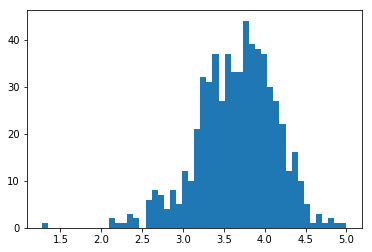

In [44]:
plt.hist(mean_userid['rating'], bins=50)

То же близко к нормальному

In [47]:
rating.describe()


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


4. Выбрать критерий, показывающий, что фильм нравится всем, или не нравится никому, и вывести топ фильмов из этих списков. Знаете ли вы эти фильмы, согласны ли с оценками?


Выберем критерий для фильма, который показывает, что он нравится всем. 

Для начала возьмем самый простой критерий, максимальное среднее

0     88448
1    100556
2    143031
3    143511
4    143559
5      6201
6    102217
7    102084
8      6192
9    145994
Name: movieId, dtype: int64

In [57]:
movie[movie['movieId'].isin(mean_movieid.sort_values(by = 'rating', ascending=False)[:10].reset_index()['movieId'])]

,movieId,title,genres
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance
4251,6201,Lady Jane (1986),Drama|Romance
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama
8107,100556,"Act of Killing, The (2012)",Documentary
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy
8154,102217,Bill Hicks: Revelations (1993),Comedy
9083,143031,Jump In! (2007),Comedy|Drama|Romance
9094,143511,Human (2015),Documentary
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy
9122,145994,Formula of Love (1984),Comedy


Скорее всего здесь учтен, тот факт, что за фильм проголосовало мало народу, но поставило 5. Нужно как-то нормировать на размер 

In [60]:
rating['count'] = 1

In [61]:
gb = rating.groupby('movieId')

In [64]:
opt = gb.agg(['mean', 'count'])

In [67]:
aggr_movie_rating = opt['rating']

In [68]:
aggr_movie_rating.head(1)

,mean,count
movieId,,
1,3.92093,215


In [69]:
aggr_movie_rating['accum'] = aggr_movie_rating['mean'] * np.log(aggr_movie_rating['count'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
movie[movie['movieId'].isin(aggr_movie_rating.sort_values(by = 'accum', ascending=False)[:10].reset_index()['movieId'])]

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
461,527,Schindler's List (1993),Drama|War
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
659,858,"Godfather, The (1972)",Crime|Drama
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


А этот рейтинг уже гораздо интересней

5. Выбрать лучшие фильмы


- см. выше. 
Можно придумать и более сложные оценки

6. Посмотреть на смещение оценок, увидеть сколько пользователей занижают оценки и завышают оценки.


Можно сделать так - рассчитать среднюю оценку для фильма. Для каждой оценки - отнять ее. После этого вычислить среднее смещение для пользователя. Потом  - построить распределние

In [72]:
mean_movieid.head(1)

,userId,rating,timestamp
movieId,,,
1,306.530233,3.92093,1.129835e+09


In [74]:
mean_movieid.reset_index()[['movieId', 'rating']].head(1)

,movieId,rating
0,1,3.92093


In [77]:
bias_user =  rating.merge(mean_movieid.reset_index()[['movieId', 'rating']], how='left', on = 'movieId')

In [79]:
bias_user.head(1)

,userId,movieId,rating_x,timestamp,count,rating_y
0,1,1,4.0,964982703,1,3.92093


In [80]:
bias_user['bias'] =  bias_user['rating_x'] - bias_user['rating_y']

In [82]:
group_bias_user = bias_user.groupby('userId').mean()

In [83]:
group_bias_user.head(1)

,movieId,rating_x,timestamp,count,rating_y,bias
userId,,,,,,
1,1854.603448,4.366379,9.649856e+08,1.0,3.557229,0.80915


(array([  1.,   1.,   7.,  19.,  56., 185., 215., 106.,  18.,   2.]),
 array([-2.14000734, -1.77778839, -1.41556944, -1.05335049, -0.69113154,
        -0.32891259,  0.03330636,  0.39552531,  0.75774426,  1.1199632 ,
         1.48218215]),
 <a list of 10 Patch objects>)

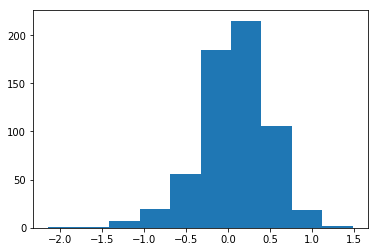

In [85]:
plt.hist(group_bias_user['bias'], bins=10)

In [86]:
group_bias_user.describe()

,movieId,rating_x,timestamp,count,rating_y,bias
count,610.000000,610.000000,6.100000e+02,610.0,610.000000,610.000000
mean,15219.524064,3.657222,1.160906e+09,1.0,3.588254,0.068968
std,20257.089591,0.480635,2.386464e+08,0.0,0.216285,0.419940
min,221.500000,1.275000,8.281246e+08,1.0,2.732226,-2.140007
25%,1641.085577,3.360000,9.478854e+08,1.0,3.445148,-0.160168
50%,4732.081335,3.694385,1.160761e+09,1.0,3.583387,0.084286
75%,22842.153586,3.997500,1.391039e+09,1.0,3.731781,0.349067
max,123329.388060,5.000000,1.537162e+09,1.0,4.166394,1.482182


Довольно симметричное распределение и где-то у половины пользователей смещение находится в интералн -0,16 - 0,35

7. Построить рекомендательную систему с помощью библиотеки surprise (или другой, по желанию). Применить подбор параметров модели на сетке, оценить качество полученной модели по выбранной вами метрике. 


В лекциях были рассмотрены следующие методы:

- user based collaborative filtering
- item based collaborative filtering
- SVD без bias
- SVD 
- Факторизационные машины с дополнительной информацией по пользователям и предметом рекомендаций и эффектом времени


Так как в соответствии с заданием требуется построить рекомендательную систему по метрике, то выбирается SVD (c bias и not bias), так как факторизационные машины были подробно рассмотрены в лекции

In [98]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from surprise import Reader, Dataset, SVD, evaluate
import numpy as np

In [89]:
svd_bias = SVD()
svd_no_bias = SVD(biased=False)

In [90]:
reader = Reader()

In [93]:
ds = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

In [96]:
cross_validate(svd_bias, ds, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8788  0.8745  0.8813  0.8723  0.8671  0.8748  0.0050  
MAE (testset)     0.6746  0.6690  0.6790  0.6694  0.6671  0.6718  0.0044  
Fit time          3.40    3.39    3.43    3.40    3.38    3.40    0.02    
Test time         0.10    0.10    0.10    0.10    0.10    0.10    0.00    


{'test_rmse': array([0.87877265, 0.87450591, 0.88134405, 0.87233042, 0.86708372]),
 'test_mae': array([0.67455184, 0.66901204, 0.67900581, 0.66937372, 0.66705558]),
 'fit_time': (3.40299916267395,
  3.385000228881836,
  3.4290003776550293,
  3.3980019092559814,
  3.3799774646759033),
 'test_time': (0.10200047492980957,
  0.10299992561340332,
  0.10199975967407227,
  0.09802675247192383,
  0.10002326965332031)}

In [97]:
cross_validate(svd_no_bias, ds, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9852  0.9732  0.9721  0.9811  0.9775  0.9778  0.0049  
MAE (testset)     0.7576  0.7505  0.7506  0.7561  0.7540  0.7538  0.0029  
Fit time          3.42    3.39    3.42    3.40    3.38    3.40    0.02    
Test time         0.09    0.09    0.09    0.08    0.08    0.09    0.00    


{'test_rmse': array([0.98519641, 0.97315983, 0.97205164, 0.98110692, 0.97746051]),
 'test_mae': array([0.7575745 , 0.75046455, 0.75062538, 0.75607406, 0.75403295]),
 'fit_time': (3.4160001277923584,
  3.3889999389648438,
  3.422999858856201,
  3.3990249633789062,
  3.3829777240753174),
 'test_time': (0.08800029754638672,
  0.08900022506713867,
  0.08500003814697266,
  0.08299827575683594,
  0.08299803733825684)}

Лучшее качество без bias. Возьмем его дальше в работу

Поиск для сетки возьмем из лекции и модифицируем

https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

In [102]:
param_grid = {
    'lr_all': [0.005, 0.05],
    'reg_all': [0.02, 0.002],
    'n_factors': [5, 10, 100, 500],
    'n_epochs': [10, 100]
}

gs = RandomizedSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1, refit=True)

gs.fit(ds)

# best RMSE score
print(gs.best_score['rmse'])

0.8732411078678107


8. Получить рекомендации для нового пользователя, совпадают ли они с лучшими фильмами?


In [106]:
gs.best_params

{'rmse': {'lr_all': 0.05, 'reg_all': 0.02, 'n_factors': 500, 'n_epochs': 10},
 'mae': {'lr_all': 0.05, 'reg_all': 0.02, 'n_factors': 500, 'n_epochs': 10}}

In [107]:
gs.best_score

{'rmse': 0.8732411078678107, 'mae': 0.6720483983036446}

In [143]:
testset = [[650, x, 4] for x in movie['movieId']]


In [137]:
est = gs.best_estimator['rmse']

In [145]:
predictions = est.test(testset)

In [148]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [149]:
top =  get_top_n(predictions)

In [171]:
user_rating=[]
for uid, user_ratings in top.items():
    user_rating.extend(user_ratings)
user_rating = list(map(lambda x: x[0], user_rating))

In [172]:
user_rating

[318, 296, 2959, 260, 858, 177593, 750, 2571, 1196, 2324]

In [174]:
movie[movie['movieId'].isin(user_rating)].head(10)

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1730,2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller
9618,177593,"Three Billboards Outside Ebbing, Missouri (2017)",Crime|Drama


Мой рейтинг оказался довольно близко к сущестсующему

9. Поставьте оценку какому-нибудь фильму (который вы знаете и можете поставить оценку) и получите рекомендации, насколько они качественные по вашим ощущениям? Сделайте это для фильма с негативной оценкой и для фильма с позитивной оценкой.
10. Добавляйте оценки и посмотрите, как изменяются рекомендации фильмов. Соответствуют ли они вашим предпочтениям? Есть ли недостатки у системы? Сколько нужно оценок для того, чтобы рекомендации стали релевантными? (в этом пункте добавляйте оценки в том числе из интересного вам жанра для пункта 11)


In [176]:
rating.head(1)

,userId,movieId,rating,timestamp,count
0,1,1,4.0,964982703,1


In [177]:
rating.describe()

,userId,movieId,rating,timestamp,count
count,100836.000000,100836.000000,100836.000000,1.008360e+05,100836.0
mean,326.127564,19435.295718,3.501557,1.205946e+09,1.0
std,182.618491,35530.987199,1.042529,2.162610e+08,0.0
min,1.000000,1.000000,0.500000,8.281246e+08,1.0
25%,177.000000,1199.000000,3.000000,1.019124e+09,1.0
50%,325.000000,2991.000000,3.500000,1.186087e+09,1.0
75%,477.000000,8122.000000,4.000000,1.435994e+09,1.0
max,610.000000,193609.000000,5.000000,1.537799e+09,1.0


In [180]:
rating = rating.append({'userId': 611, 'movieId': 260, 'rating': 5}, ignore_index=True )

In [187]:
def train(rating):
    ds = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)
    gs.fit(ds)
    return gs

In [188]:
gs = train(rating)

In [189]:
def top_r(gs, id):
    testset = [[id, x, 4] for x in movie['movieId']]
    est = gs.best_estimator['rmse']
    predictions = est.test(testset)
    top =  get_top_n(predictions)
    user_rating=[]
    for uid, user_ratings in top.items():
        user_rating.extend(user_ratings)
    user_rating = list(map(lambda x: x[0], user_rating))
    return user_rating

In [190]:
movie[movie['movieId'].isin(top_r(gs, 611))].head(10)

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
585,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
694,912,Casablanca (1942),Drama|Romance
4529,6711,Lost in Translation (2003),Comedy|Drama|Romance
4604,6857,Ninja Scroll (Jûbei ninpûchô) (1995),Action|Adventure|Animation|Fantasy
5006,7748,Pierrot le fou (1965),Crime|Drama
6783,60333,Encounters at the End of the World (2008),Documentary
7372,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX


In [191]:
rating = rating.append({'userId': 611, 'movieId': 1196, 'rating': 5}, ignore_index=True )
rating = rating.append({'userId': 611, 'movieId': 356, 'rating': 1}, ignore_index=True )

In [192]:
gs = train(rating)

In [193]:
movie[movie['movieId'].isin(top_r(gs, 611))].head(10)

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
311,353,"Crow, The (1994)",Action|Crime|Fantasy|Thriller
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1218,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
3195,4307,"Fast Food, Fast Women (2000)",Comedy|Romance
3294,4454,More (1998),Animation|Drama|Sci-Fi|IMAX
4348,6350,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,Action|Adventure|Animation|Children|Fantasy|Sc...
7184,72356,Partly Cloudy (2009),Animation|Children|Comedy|Fantasy
7355,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX
9009,140174,Room (2015),Drama


In [194]:
movie[movie['title'].str.contains('Star Wars')]

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1979,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
3832,5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
5896,33493,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi
6823,61160,Star Wars: The Clone Wars (2008),Action|Adventure|Animation|Sci-Fi
7367,79006,Empire of Dreams: The Story of the 'Star Wars'...,Documentary
8683,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX
8908,135216,The Star Wars Holiday Special (1978),Adventure|Children|Comedy|Sci-Fi


In [195]:
ating = rating.append({'userId': 611, 'movieId': 179819, 'rating': 5}, ignore_index=True )
rating = rating.append({'userId': 611, 'movieId': 140174, 'rating': 1}, ignore_index=True )

In [196]:
gs = train(rating)

In [197]:
movie[movie['movieId'].isin(top_r(gs, 611))].head(10)

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1032,1344,Cape Fear (1962),Crime|Drama|Thriller
2765,3703,"Road Warrior, The (Mad Max 2) (1981)",Action|Adventure|Sci-Fi|Thriller
3277,4437,Suspiria (1977),Horror
3646,5010,Black Hawk Down (2001),Action|Drama|War
6772,60069,WALL·E (2008),Adventure|Animation|Children|Romance|Sci-Fi
6885,63082,Slumdog Millionaire (2008),Crime|Drama|Romance


In [198]:
ating = rating.append({'userId': 611, 'movieId': 5378, 'rating': 5}, ignore_index=True )
rating = rating.append({'userId': 611, 'movieId': 750, 'rating': 1}, ignore_index=True )

In [199]:
gs = train(rating)
movie[movie['movieId'].isin(top_r(gs, 611))].head(10)

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
910,1209,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1051,1366,"Crucible, The (1996)",Drama
1946,2580,Go (1999),Comedy|Crime
2462,3275,"Boondock Saints, The (2000)",Action|Crime|Drama|Thriller
4800,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
6073,41285,Match Point (2005),Crime|Drama|Romance
6885,63082,Slumdog Millionaire (2008),Crime|Drama|Romance


Как-то не очень. Теперь возьмем только фильмы с Adventure

11. Построить рекомендательную систему по подвыборке - выбрать интересный вам жанр. Изменились ли рекомендации? Стали лучше\хуже?


In [201]:
movie_adventure = movie[movie['genres'].str.contains('Adventure')]

In [202]:
rating_adventure = rating[rating['movieId'].isin(movie_adventure['movieId'])]

In [203]:
movie_adventure.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [205]:
rating_adventure.head(1)

,userId,movieId,rating,timestamp,count
0,1.0,1.0,4.0,964982703.0,1.0


In [206]:
ds = Dataset.load_from_df(rating_adventure[['userId', 'movieId', 'rating']], reader)
gs.fit(ds)


In [208]:
movie[movie['movieId'].isin(top_r(gs, 611))].head(20)

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
900,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
903,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western
1494,2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama
2218,2947,Goldfinger (1964),Action|Adventure|Thriller
4764,7090,Hero (Ying xiong) (2002),Action|Adventure|Drama
6242,46578,Little Miss Sunshine (2006),Adventure|Comedy|Drama


In [209]:
ating = rating.append({'userId': 611, 'movieId': 2628, 'rating': 5}, ignore_index=True )
rating = rating.append({'userId': 611, 'movieId': 1136, 'rating': 1}, ignore_index=True )

In [210]:
gs.fit(ds)
movie[movie['movieId'].isin(top_r(gs, 611))].head(20)

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
585,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
911,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
990,1291,Indiana Jones and the Last Crusade (1989),Action|Adventure
2283,3030,Yojimbo (1961),Action|Adventure
2674,3578,Gladiator (2000),Action|Adventure|Drama
3984,5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy
8274,105504,Captain Phillips (2013),Adventure|Drama|Thriller|IMAX
8636,119145,Kingsman: The Secret Service (2015),Action|Adventure|Comedy|Crime


Уже гораздо лучше